In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv('developer_survey_2017/survey_results_public.csv', sep=',')
schema = pd.read_csv('developer_survey_2017/survey_results_schema.csv', sep=',')

In [3]:
data_np = data.as_matrix()
schema_dict = {i:j for i,j in schema.as_matrix()}

In [10]:
schema_dict = {i:j for i,j in schema.as_matrix()}

In [27]:
def counts_schema(data_np, col_idx, schema_dict, data):
    unique, counts = np.unique(data_np[:, col_idx], return_counts=True)
    value_counts = np.asarray((unique, counts)).T

    key = data.columns[col_idx]
    description = schema_dict[key]
    return description, value_counts

In [30]:
for idx in xrange(data_np.shape[1]):
    d, v = counts_schema(data_np, idx, schema_dict, data)
    print idx
    print d
    print v

0
Respondent ID number
[[1 1]
 [2 1]
 [3 1]
 ..., 
 [51390 1]
 [51391 1]
 [51392 1]]
1
Which of the following best describes you?
[['None of these' 914]
 ['Professional developer' 36131]
 ['Professional non-developer who sometimes writes code' 5140]
 ['Student' 8224]
 ['Used to be a professional developer' 983]]
2
Do you program as a hobby or contribute to open source projects?
[['No' 9787]
 ['Yes, I contribute to open source projects' 3048]
 ['Yes, I program as a hobby' 24801]
 ['Yes, both' 13756]]
3
In which country do you currently live?
[['Afghanistan' 60]
 ['Aland Islands' 22]
 ['Albania' 76]
 ['Algeria' 41]
 ['American Samoa' 5]
 ['Andorra' 6]
 ['Angola' 9]
 ['Anguilla' 2]
 ['Antarctica' 11]
 ['Antigua and Barbuda' 3]
 ['Argentina' 255]
 ['Armenia' 51]
 ['Aruba' 2]
 ['Australia' 913]
 ['Austria' 477]
 ['Azerbaidjan' 27]
 ['Bahamas' 1]
 ['Bahrain' 12]
 ['Bangladesh' 184]
 ['Barbados' 3]
 ['Belarus' 91]
 ['Belgium' 404]
 ['Belize' 4]
 ['Benin' 2]
 ['Bermuda' 2]
 ['Bhutan' 2]
 ['Bol

## Which sites are programmers uploading their resume in the US
  1. Column Index 66 is for 'JobProfile'
  2. Column Index 3 is for 'Country'

In [98]:
print schema_dict[data.columns[66]]

On which of the following sites do you maintain a profile, CV, or resumé?


In [88]:
us_idx = np.where(data_np[:,3] == 'United States')
us_jobprofile = data_np[us_idx, 66][0]

In [89]:
us_jobprofile

array(['Other', 'LinkedIn; Other', nan, ..., 'LinkedIn', 'LinkedIn', nan], dtype=object)

In [91]:
us_sites = [i.split('; ') for i in us_jobprofile if i == i]
unique, counts = np.unique(np.concatenate(us_sites), return_counts=True)

In [92]:
value_counts = np.asarray((unique, counts)).T

In [93]:
value_counts

array([['Dice', '689'],
       ['Glassdoor', '735'],
       ['Hired.com', '323'],
       ['Indeed', '988'],
       ['LinkedIn', '5581'],
       ['Monster', '701'],
       ['Other', '813'],
       ['TripleByte', '33']], 
      dtype='|S21')

# What language and libraries do data scientist use?
  1. Column Index 14 is for 'DeveloperType'
  2. Column Index 88:96 is for 'HaveWorkedLanguage', 'WantWorkLanguage', 'HaveWorkedFramework',
       'WantWorkFramework', 'HaveWorkedDatabase', 'WantWorkDatabase',
       'HaveWorkedPlatform', 'WantWorkPlatform', 'IDE

In [107]:
def concat_multivalue_array(array, seperator='; '):
    multivalue_array = [i.split(seperator) for i in array if i == i]
    concat_array = np.concatenate(multivalue_array)
    return concat_array

In [110]:
# 'DeveloperType' related to Data Scientist
np.unique(concat_multivalue_array(data_np[:,14]))

array(['Data scientist', 'Database administrator',
       'Desktop applications developer', 'DevOps specialist',
       'Developer with a statistics or mathematics background',
       'Embedded applications/devices developer', 'Graphic designer',
       'Graphics programming', 'Machine learning specialist',
       'Mobile developer', 'Other', 'Quality assurance engineer',
       'Systems administrator', 'Web developer'], 
      dtype='|S53')

In [113]:
# dsType = 'DataScienceType'
types = np.unique(concat_multivalue_array(data_np[:,14]))
dsType = types[[0,4,8]] 

In [141]:
# dsIndex = 'DataScienceIndex' bool array to filter responders with data science relevancy
def check_substring(string, string_list=dsType):
    if string == string:
        output = any([True if i in string else False for i in string_list])
        return output
    else:
        return False

vfunc = np.vectorize(check_substring)
dsIndex = vfunc(data_np[:,14])

In [147]:
# dsData = 'DataScienceData' filter data with jobtype related to datascience
dsData = data_np[dsIndex,:].copy()

In [152]:
def value_counts(array):
    unique, counts = np.unique(array, return_counts=True)
    value_counts = np.asarray((unique, counts)).T
    return value_counts

In [155]:
# return value counts
for c in xrange(88, 97):
    x = concat_multivalue_array(dsData[:,c])
    v_counts = value_counts(x)
    print data.columns[c]
    print v_counts

HaveWorkedLanguage
[['Assembly' '319']
 ['C' '1149']
 ['C#' '1683']
 ['C++' '1529']
 ['Clojure' '100']
 ['CoffeeScript' '184']
 ['Common Lisp' '70']
 ['Dart' '32']
 ['Elixir' '59']
 ['Erlang' '61']
 ['F#' '105']
 ['Go' '304']
 ['Groovy' '215']
 ['Hack' '23']
 ['Haskell' '135']
 ['Java' '2122']
 ['JavaScript' '2804']
 ['Julia' '46']
 ['Lua' '167']
 ['Matlab' '391']
 ['Objective-C' '338']
 ['PHP' '1175']
 ['Perl' '315']
 ['Python' '2150']
 ['R' '534']
 ['Ruby' '439']
 ['Rust' '82']
 ['SQL' '2770']
 ['Scala' '410']
 ['Smalltalk' '81']
 ['Swift' '305']
 ['TypeScript' '440']
 ['VB.NET' '323']
 ['VBA' '284']
 ['Visual Basic 6' '178']]
WantWorkLanguage
[['Assembly' '274']
 ['C' '749']
 ['C#' '1232']
 ['C++' '1270']
 ['Clojure' '261']
 ['CoffeeScript' '149']
 ['Common Lisp' '117']
 ['Dart' '67']
 ['Elixir' '187']
 ['Erlang' '175']
 ['F#' '309']
 ['Go' '845']
 ['Groovy' '150']
 ['Hack' '42']
 ['Haskell' '413']
 ['Java' '1338']
 ['JavaScript' '1863']
 ['Julia' '168']
 ['Lua' '177']
 ['Matlab' '1

# Salary
  1. Column Index 152 is for 'Salary'

In [175]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')

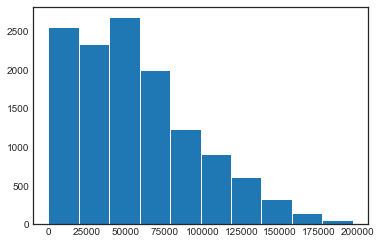

In [176]:
# All Salary
salary = data_np[:, 152]
salary = np.array([i for i in salary if i == i])
plt.hist(salary, edgecolor='white');

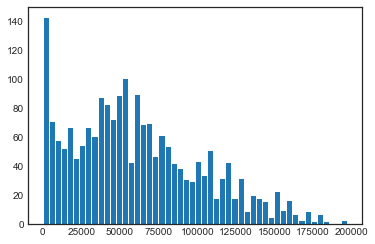

In [210]:
# # Data Science Salary
dsSalary = data_np[dsIndex, 152]
dsSalary = np.array([i for i in dsSalary if i == i])
plt.hist(dsSalary, 50, edgecolor='white');

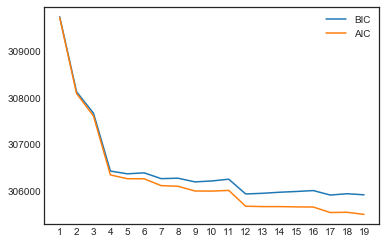

In [192]:
# How many distributions does salary have?
from sklearn.mixture import GaussianMixture
from scipy import stats

n_estimators = np.arange(1, 20)
clfs = [GaussianMixture(n_components=n, max_iter=1000, random_state=3).fit(salary[:,np.newaxis]) for n in n_estimators]
bics = [clf.bic(salary[:, np.newaxis]) for clf in clfs]
aics = [clf.aic(salary[:, np.newaxis]) for clf in clfs]

plt.plot(n_estimators, bics, label='BIC')
plt.plot(n_estimators, aics, label='AIC')
plt.xticks(n_estimators)
plt.legend();

In [225]:
# seems to show 4 or 12 different groups of distribution
n = 4

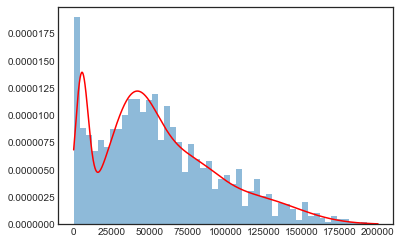

In [226]:
clf = GaussianMixture(n_components=n, max_iter=500, random_state=3).fit(salary[:,np.newaxis])
xpdf = np.linspace(0, 200000, 100000)
density = np.exp(clf.score_samples(xpdf[:, np.newaxis]))

plt.hist(salary, 50, normed=True, alpha=0.5)
plt.plot(xpdf, density, '-r')

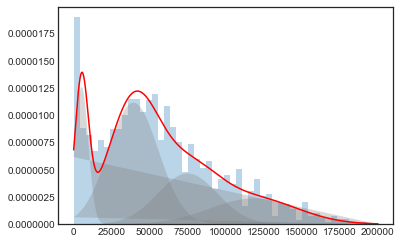

In [227]:
from scipy import stats
plt.hist(salary, 50, normed=True, alpha=0.3)
plt.plot(xpdf, density, '-r')

for i in range(clf.n_components):
    pdf = clf.weights_[i] * stats.norm(clf.means_[i, 0], np.sqrt(clf.covariances_[i, 0])).pdf(xpdf)
    plt.fill(xpdf, pdf, facecolor='gray',
             edgecolor='none', alpha=0.3)

In [221]:
clf.means_
# idx = 0, high salary
# idx = 1, mid low salary
# idx = 2, low salary
# idx = 3, mid high salary

array([[ 118189.85997117],
       [  39296.36011876],
       [   5229.59744195],
       [  74870.7785139 ]])

### Filter Data to Salary and Space/Tab
  1. Column Index 81 is for 'Tabs or spaces?'
  2. Column Index 152 is for 'Salary'

In [247]:
# stData = 'Space/Tab Data'
stData = data_np[:,[81,152]]
naIndex = np.array([True if i != i else False for i in stData[:, 1]])
stData = stData[~naIndex]

In [251]:
n4gmm_proba = clf.predict_proba(stData[:,1][:,np.newaxis])

In [254]:
n4gmm_proba[0][0]

0.78243106264831308